In [3]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

# Background

The kinetics of a solid-state reaction cannot be calculated or approximated as with liquid r gas phae reactions. This is due to the solids in a solid-state reaction not being able to have a concentratration on otd own, uness if it is dossolved in some sort of solvent. This requires the need for a new variable or proxy needed to be used to evaluate the progression of a solid-state reaction as the concentration of the components can't be used. A common liquid or gas phase reaction of **A + B -> C + D** can be calculated as follows:

$$
\Large \mathbf{r = k C_A^n C_B^m}
$$


With r being the reaction rate, k being the reaction rate constant, $C_A$ is the concentration of A, $C_B$ is the concentration of B, and n and m are the reaction orders, usually related to the stoichiometry of a reaction. The rate has the Arrhenius temperature dependence, and thus the need to evaluate the pre-exponential constant (A) and the activation energy ($E_A$).


The proxy commonly used in solid-state reaction inetics is the extent of conversion ($\alpha\$) which is based on the fractional conversion of the solid reagent in the reaction. As the solid-stae reaction progresses, the solid reagent's mass will decrease, and thus the need arises to have some sort of proxy based on the mass of the solid reagent at any given time during the reaction. In a thermogravimetric analysis (TGA) experiment the mass loss of the sample considered during the reaction is monitored as this will serve as the fundamental basis on what the reaction rate will be based off. The extent of conversion at any given point can be calculated as follows:

$$
\Large \mathbf{\alpha = \frac{W_i - W_t}{W_i - W_f}}
$$

With $W_i$, $W_t$, and $W_f$, being the sample mass at the initial stage, at any given point, and at the end of the reaction respectively. The proxy is chosen or defined in such a way that the $\alpha$ can only vary between zero and one. This means that when solid-state reactions are modelled, there needs to be sufficient boundary conditions specified such that the extent of conversion does not increase to more than one.

During a solid-state reaction, there are numerous possible mechanisms that can govern the reaction or even multiple mechanisms can take place at once with the solowets mechanisms governing the rate of the reaction. This is where the model fitting process of a solid-state reaction becomes extremely difficult as multiple reaction mechanisms can be a good fit for the set of solid-state kinetic data, but the fitted parameters (commonly referred to as the kinetic triplet consisting of A, the reaction mechanism. and $E_A$) could return significantly different resulst when applied at different temperatures or heating rates of the same reactions. The reaction rate of a solid-state reaction can be expressed as for a isothermal run:  

$$
\Large \mathbf{\frac{d\alpha}{dt} = k \, f(\alpha) \, h(P)}
$$

With f($\alpha$) being the reaction mechanism, and h(P) being a function of the partial pressure of the gas phase reactions and products. When the gas phase reagents are supplied in a large excess and the gas phase products are removed very quickly, the h(P) term becomes negligible and approaches 1. The reaction rate can then be epressed as:

$$
\Large \mathbf{\frac{d\alpha}{dt} = k \, f(\alpha)}
$$

A general form of f($\alpha\$): 


$$
\Large f(\alpha) = (1 - \alpha)^n \alpha^m \left[-\ln(1 - \alpha)\right]^p
$$

For solid-state reactions the need arises to have a good estimate of what the reaction mechanism for a reaction is before the model fitting process. every reaction mechanism has its own distinctive profile for a $\alpha\$ vs, time plot, but this requires the reaction to be done under isothermal conditions. This will cause some of the reaction to take place before the temperature at which the reaction will be analysed be reached. This will introduce errors and will require the data for the reaction before the required temperature was reached to be neglected and the rest to be considered. This also will only help deterimining the mechanism for the reaction, but won't be any indication of what the activation energy or the ore-exponential constant is. It is well known for solid-state reactions that both the pre-exponential constant and the activation energy can be a function of temperature. This requires the need for a new way todefine the reaction rate for a non-isothermal run.

The heating rate ($\beta$) is defined as the rate at which the temperature of the **sample** increases as the reaction progresses. The new reaction rate for a non-isothermal experimental run can be defined as:

$$
\Large \mathbf{\beta \frac{d\alpha}{dT} = k(T) f(\alpha)}
$$

This now allows the use of non-isothermal reaction data to fit the kinetic triplet for a solid-state reaction. The recommended amount of data points used for fitting a kinetic triplet is 100-1000 per temperature programs, to ensure the any bias during the model fitting process is eliminated, but even though thousands of data points are analysed, the model fitting process still has flaws. The requirement will be that several reaction mechanisms are fitted to each of these data sets and they are compared using some sort of statistical method, but this will be extremely tedious.

The need arises for alternative techniques to have a approximation of what one of the three parameters are for the kinetic triplet. To data the only method available to isolate any one of these parameters are called **isoconversiona methods** which isolated the $E_A$ at every extent of conversion. It is crucial to understand that there are two types of isoconversional methods: **integral and differential methods**. These methods can either be model-based or model-free, with the most of the differentail methods being model-based methods. Integral methods are more commonly used in practice as they have far less assumptions than the differential methods and do not require any prior knowledge of the reaction mechanism or the pre-exponential constant.

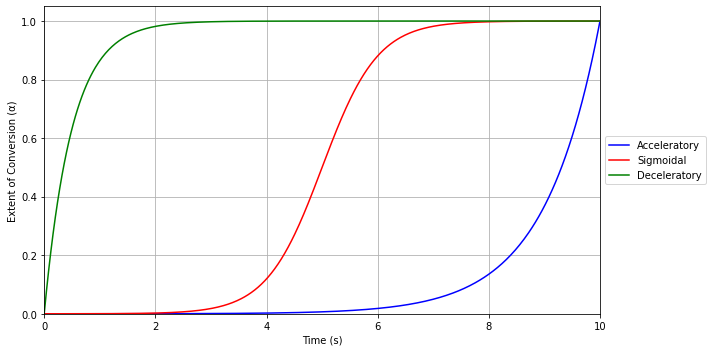

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector
t = np.linspace(0, 10, 500)

# Acceleratory: exponential rise, slow to start
alpha_accel = np.exp(t) - 1
alpha_accel = alpha_accel / np.max(alpha_accel)  # normalize to 0–1

# Deceleratory: fast at first, then levels off (1 - exponential decay)
alpha_decel = 1 - np.exp(-2 * t)

# Sigmoidal: S-shaped (logistic function)
alpha_sigmoid = 1 / (1 + np.exp(-2 * (t - 5)))

# --- Plotting ---
plt.figure(figsize = (10,5))
plt.plot(t, alpha_accel, label="Acceleratory", color='blue')
plt.plot(t, alpha_sigmoid, label="Sigmoidal", color='red')
plt.plot(t, alpha_decel, label="Deceleratory", color='green')

plt.xlabel("Time (s)")
plt.ylabel("Extent of Conversion (α)")
plt.ylim(0, 1.05)
plt.xlim(0, 10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()  # Then show



## Data generation

We will firstly generate data as very limited solid-state reaction data is available for analysis. The general model will be used as this is purely for data generation. The constants can at any time be varied for further analysis to test the computational model for predicting of $E_{\alpha}$ values.

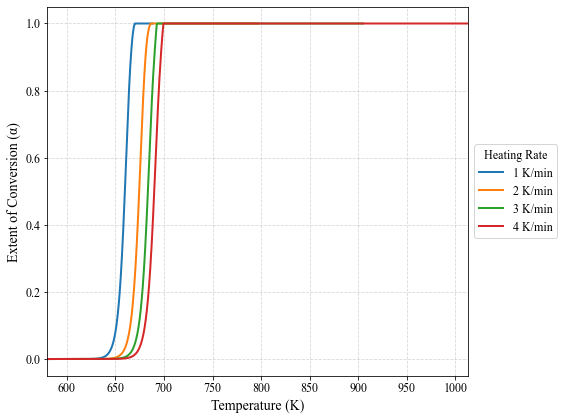

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
E = 161260  # J/mol
Ko = 2.08e10  # 1/s
R = 8.314  # J/mol*K
m, n, p = 1, 0.3, 0.5

# Heating rates in K/min → K/s
beta_list = [1, 2, 3, 4]
beta_list_s = np.array(beta_list) / 60

# Time grid
t_max = 6500  # seconds
t_eval = np.linspace(0, t_max, 1500)
T0 = 580  # starting temperature (K)

# Non-isothermal reaction model
def noniso_model(t, y, beta):
    alpha = np.clip(y[0], 1e-12, 1 - 1e-12)  # clamp inside solver
    T = T0 + beta * t
    k = Ko * np.exp(-E / (R * T))
    f_alpha = ((1 - alpha) ** m) * (alpha ** n) * (-np.log(1 - alpha)) ** p
    return [k * f_alpha]

# Plot α vs T
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12, 'font.family': 'Times New Roman'})
colors = plt.cm.viridis(np.linspace(0.2, 0.95, len(beta_list_s)))

for beta_s, beta_min, color in zip(beta_list_s, beta_list, colors):
    sol = solve_ivp(noniso_model, (0, t_max), [1e-6], t_eval=t_eval, args=(beta_s,))
    T_array = T0 + beta_s * t_eval
    alpha_vals = np.clip(sol.y[0], 0, 1)  # clamp after solving
    plt.plot(T_array, alpha_vals, linewidth=2, label=f'{beta_min} K/min')

plt.xlabel('Temperature (K)', fontsize=14)
plt.ylabel('Extent of Conversion (α)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(T0, np.max(T_array))
plt.legend(title='Heating Rate', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.show()


# Isoconversional Analysis 

The reaction rate a a specific extent of conversion can be seen as only a function of temperature. The definition of isoconversional methods are as follows:

$$
\Large \left( \frac{\partial (d\alpha/dt)}{\partial T^{-1}} \right)_{\alpha} = -\frac{E_{\alpha}}{R}
$$



Firstly we assume that the reaction mechanism/model does not depend on the reaction temperature. This can pose some difficulties as it happens quite frequently that the reaction mechanism does change at different temperatures. This happens due to the model fitting process where certain reaction mechanisms might give better fits to experimental data at certain temperatures or temperature ranges.


# The Approximation

$$
\Large \partial\left(\frac{d\alpha}{dt}\right) \approx \Delta \left( \frac{d\alpha}{dt} \right)
$$


$$
\Large \partial T^{-1} \approx \Delta T^{-1}
$$


We can thus rewrite the equation in the following form for analysis:

$$
\Large \frac{\Delta \left( \frac{d\alpha}{dt} \right)}{\Delta T^{-1}} \approx -\frac{E_{\alpha}}{R}
$$


This does pose limitations however as the the $(\Delta)$ terms will need a very small jump to be calculated accurately. The method can be extended to non-isothermal runs, by multiplying the left of the equation with $\beta\$.

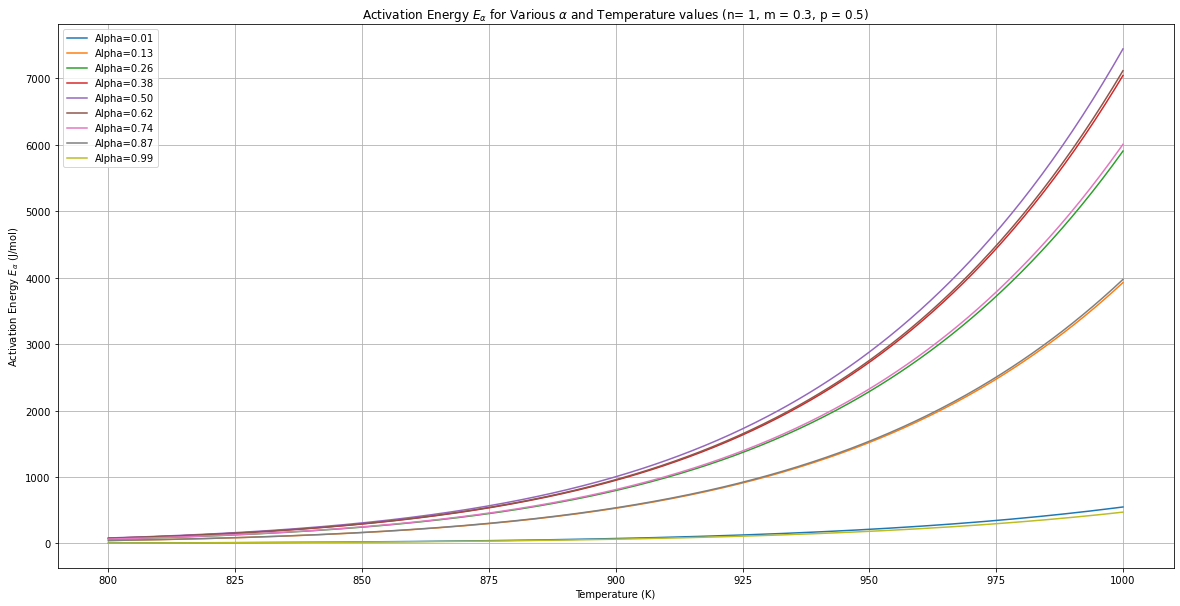

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E = 161260  # J/mol
Ko = 2.08e10     # 1/s
R = 8.314    # J/mol*K
m, n, p = 1, 0.3, 0.5


beta_list = [1, 2, 3, 4]  # K/min
beta_list_s = np.array(beta_list) / 60  # K/s

# SSRX function (Solid-State Reaction Model)
def SSRX(alpha, T):
    """Calculate the rate of change of alpha (dalpha/dt) at given alpha and temperature T"""
    alpha = np.clip(alpha, 1e-10, 1-1e-10)  # Ensure alpha is between 0 and 1
    
    # Arrhenius rate constant
    k = Ko * np.exp(-E / (R * T)) 
    
    # Reaction model
    f_alpha = ((1 - alpha)**m) * (alpha**n) * (-np.log(1 - alpha))**p  
    dalpha_dt = k * f_alpha
    return dalpha_dt

# Isocon_analysis function (to calculate E_alpha)
def Isocon_analysis(alpha, T1, T2):
    """Calculate E_alpha using two temperatures and one alpha"""
    # Calculate dalpha/dt at two different temperatures (T1 and T2)
    dalphadt1 = SSRX(alpha, T1)  # Rate at T1
    dalphadt2 = SSRX(alpha, T2)  # Rate at T2
    
    # Calculate delta values for T and dalpha/dt
    delta_inver_T = (1/T1 - 1/T2)
    delta_dalphadt = dalphadt1 - dalphadt2
    
    # Calculate the activation energy E_alpha
    E_alpha = (delta_dalphadt / delta_inver_T) * (-R)
    
    return E_alpha

# Define temperature and alpha ranges
temperatures = np.arange(800, 1001, 0.5)  # Temperatures from 500K to 1000K
alpha_values = np.linspace(0.01, 0.99, 9)  # Alpha values from 0.01 to 0.99 (10 points)

# Matrix to store E_alpha values
E_alpha_matrix = np.zeros((len(alpha_values), len(temperatures) - 1))  # E_alpha for each alpha

# Loop through each alpha value
for j, alpha in enumerate(alpha_values):
    # Loop through all temperatures and calculate E_alpha for each pair of consecutive temperatures
    for i in range(len(temperatures) - 1):
        T1 = temperatures[i]    # Current temperature
        T2 = temperatures[i+1]  # Next temperature (T1 + 1K)
        
        # Calculate E_alpha for the current alpha and temperature pair
        E_alpha_matrix[j, i] = Isocon_analysis(alpha, T1, T2)

# Plotting
plt.figure(figsize=(20, 10))
for j, alpha in enumerate(alpha_values):
    plt.plot(temperatures[:-1], E_alpha_matrix[j, :], label=f'Alpha={alpha:.2f}')

plt.xlabel('Temperature (K)')
plt.ylabel(r'Activation Energy $E_{\alpha}$ (J/mol)')
plt.title(r'Activation Energy $E_{\alpha}$ for Various ${\alpha}$ and Temperature values (n= 1, m = 0.3, p = 0.5)')
plt.grid(True)
plt.legend()
plt.show()


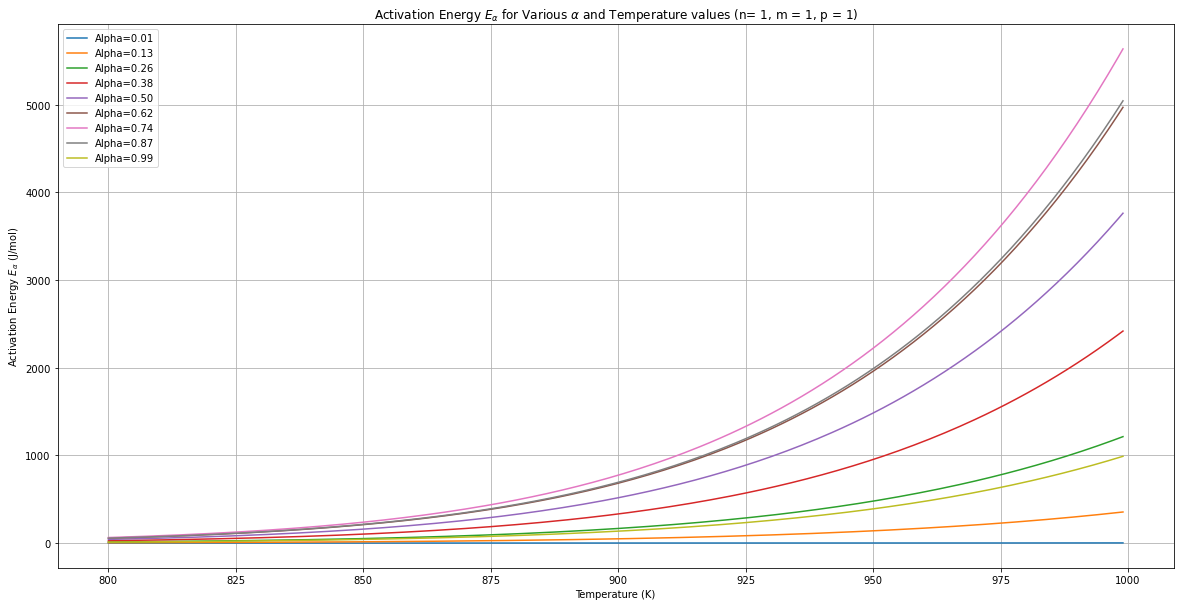

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E = 150 * 1000  # Activation energy in J/mol
Ko = 10**7  # Pre-exponential factor in 1/s
R = 8.314  # Gas constant in J/(mol*K)
m, n, p = 1, 1, 1  # Reaction orders

# SSRX function (Solid-State Reaction Model)
def SSRX(alpha, T):
    """Calculate the rate of change of alpha (dalpha/dt) at given alpha and temperature T"""
    alpha = np.clip(alpha, 1e-10, 1-1e-10)  # Ensure alpha is between 0 and 1
    
    # Arrhenius rate constant
    k = Ko * np.exp(-E / (R * T)) 
    
    # Reaction model
    f_alpha = ((1 - alpha)**m) * (alpha**n) * (-np.log(1 - alpha))**p  
    dalpha_dt = k * f_alpha
    return dalpha_dt

# Isocon_analysis function (to calculate E_alpha)
def Isocon_analysis(alpha, T1, T2):
    """Calculate E_alpha using two temperatures and one alpha"""
    # Calculate dalpha/dt at two different temperatures (T1 and T2)
    dalphadt1 = SSRX(alpha, T1)  # Rate at T1
    dalphadt2 = SSRX(alpha, T2)  # Rate at T2
    
    # Calculate delta values for T and dalpha/dt
    delta_inver_T = (1/T1 - 1/T2)
    delta_dalphadt = dalphadt1 - dalphadt2
    
    # Calculate the activation energy E_alpha
    E_alpha = (delta_dalphadt / delta_inver_T) * (-R)
    
    return E_alpha

# Define temperature and alpha ranges
temperatures = np.arange(800, 1001, 1)  # Temperatures from 500K to 1000K
alpha_values = np.linspace(0.01, 0.99, 9)  # Alpha values from 0.01 to 0.99 (10 points)

# Matrix to store E_alpha values
E_alpha_matrix = np.zeros((len(alpha_values), len(temperatures) - 1))  # E_alpha for each alpha

# Loop through each alpha value
for j, alpha in enumerate(alpha_values):
    # Loop through all temperatures and calculate E_alpha for each pair of consecutive temperatures
    for i in range(len(temperatures) - 1):
        T1 = temperatures[i]    # Current temperature
        T2 = temperatures[i+1]  # Next temperature (T1 + 1K)
        
        # Calculate E_alpha for the current alpha and temperature pair
        E_alpha_matrix[j, i] = Isocon_analysis(alpha, T1, T2)

# Plotting
plt.figure(figsize=(20, 10))
for j, alpha in enumerate(alpha_values):
    plt.plot(temperatures[:-1], E_alpha_matrix[j, :], label=f'Alpha={alpha:.2f}')

plt.xlabel('Temperature (K)')
plt.ylabel(r'Activation Energy $E_{\alpha}$ (J/mol)')
plt.title(r'Activation Energy $E_{\alpha}$ for Various ${\alpha}$ and Temperature values (n= 1, m = 1, p = 1)')
plt.grid(True)
plt.legend()
plt.show()


It is very interesting to see how the $E_{\alpha}$ values vary with extent of conversion and at different temperatures. At the original case condisered where n, m and p are 1, 0.3 and 0.5 respectively, it seems as if the isoconversional activation energies are almost 'paired'. For example, the $\alpha$ of 0.01 and 0.99 are almost on the similar line and follow almost exactly the same trend. If the values of n, m and p are varied from the original values to for example 1 each, the isoconversional activation energies are different for each $\alpha$ value and at every temperature. It is noted in the latter case that the $\alpha$ = 0.74 value has the graph with the highest $E_\alpha$ values

This can't be explained yet as the purpose of this project is to study solid-sate reactions. This will be discussed with my supervisor.

**_Litha's thoughts_**: Determine why they use the f($\alpha$) in the Friendman method and any of the different methods described in the solid-sate kinetics document. Determine what assumptions must be made and why. i must have a plan forwards. Currently we are strifing to compare all the different methods mentioned in the computational methods document/paper in order to make a model that can predict the activantion energy of a set of data, but currently this will only be based on a model that generates data for me to train the model.

A hybrid approach where a combination of the isoconversional analysis along with the best mechanism for the data can be used where the isoconversional analysis will give a good etimate of what the activation energy should be and the model fitting section of a fitting software can predict the best model and the adequate pre-exponential constant.

## Friedman Method

The Friedman method is noted as a differential method. The two existing methods are differential and integral methods. The more accurate methods are the integral methods due to them having a determination limit on the baseline, and can exhibit numerical instability. 

The presence of the f($\alpha$) term does not necessarily mean that you have to fit a model to the data, but this only yield the need for the choosing of a **reaction mechanism** from the shape of the experimental data. This can easily be doen for isothermal data as the shape will either be accelatory, decelatory or sigmloidal, but for non-isothermal kinetic data, thus will be extremely difficult as the increase or decrease in temperature has an impact on the reaction rate.

The general equation considered has all the possible mechanisms in them as this is purely for an analysis, but this still leaves the possibility of either determining the pre-exponential constant or the activation energy before evaluating either the pre-exponential constant or the isoconversional activation energy. As this is an isoconverional analysis and we want to **determine the activation energy** of the data, we must assume a value of A. This does pose significant limitations on the accuracy of any of the different methods considered as this would ideally be determined by fitting a pre-exponential constant to the data.

To choose a pre-exponential constant ($A$) we must consult literature to make an eductaed guess. With some inputs from ChatGPT the best starting point for some solid-state reactions are as follows:

- **First-order reactions**: \($ A \approx 10^{6} - 10^{13} \ \text{s}^{-1} \$)

- **Diffusion-controlled reactions**: \($ A \approx 10^{3} - 10^{6} \ \text{s}^{-1} \$)  
- **Complex reactions**: \( A \) can vary widely.

This can also however be used in combination with the actual model fitting software to be used to aid the solver to converge faster. This does however fall outside the scope of this project.The limitation does however come in when considereing complex reaction kinetics as this will be difficult to estimate the pre-exponential constant. This can be solved using an iterative method.

It is still possible that for a single reaction that it shows certain reaction mechanisms fit the best for certain $\alpha$ ranges or even certain temperature ranges. This makes the model fitting process extremely difficult due to the amount of uncertainties in this field of research.

**The Friedman method:**

$$
\Large \ln\left(\beta\frac{d\alpha}{dT}\right)_{\alpha,i} = \ln\left[ f(\alpha) A_{\alpha} \right] - \frac{E_{\alpha}}{R T_{\alpha,i}}
$$


It is clear from the equation above, that the Friedman method does require a mechanism. This will be excellent to analyse already existing reactions with both the reaction mechanism specified and the activation energy or the pre-exponential constant known. We will consider this below.

Please note that the model shown below might not be the first version of the model as it will continuously be updated and refined.

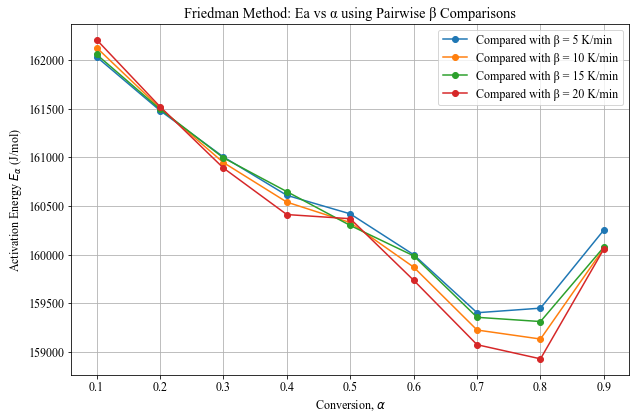

In [59]:
### import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Constants
E = 161260  # J/mol
Ko = 2.08e10     # 1/s
R = 8.314    # J/mol*K
m, n, p = 1, 0.3, 0.5

# Heating rates in K/min, converted to K/s
beta_list = [5, 10, 15, 20]
beta_list_s = np.array(beta_list) / 60

# Time settings
t_max = 6500  # seconds
t_eval = np.linspace(0, t_max, 1500)
T0 = 580  # starting temp in K

# Reaction model
def friedman_model(t, y, beta):
    alpha = np.clip(y[0], 1e-8, 1 - 1e-8)
    T = T0 + beta * t
    k = Ko * np.exp(-E / (R * T))
    f_alpha = ((1 - alpha) ** m) * (alpha ** n) * (-np.log(1 - alpha)) ** p
    return [k * f_alpha]

# Simulate data
alpha_list, T_list, dadt_list = [], [], []

for beta in beta_list_s:
    sol = solve_ivp(
        friedman_model, [0, t_max], [1e-6],
        t_eval=t_eval, args=(beta,),
        rtol=1e-6, atol=1e-10
    )
    t = sol.t
    alpha = sol.y[0]
    T = T0 + beta * t
    dadt = np.gradient(alpha, t)

    alpha_list.append(alpha)
    T_list.append(T)
    dadt_list.append(dadt)

# Friedman Method: compute Ea vs α per pair of beta values
alpha_target = np.linspace(0.1, 0.9, 9)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

plt.figure(figsize=(9, 6))
for idx1 in range(len(beta_list_s)):
    Ea_alpha = []
    for a in alpha_target:
        ln_rates = []
        inv_T = []

        for idx2 in range(len(beta_list_s)):
            if idx1 == idx2:
                continue  # only pair with other beta

            if np.any(alpha_list[idx1] >= a) and np.any(alpha_list[idx2] >= a):
                # Interpolate for both
                T1 = interp1d(alpha_list[idx1], T_list[idx1], fill_value='extrapolate')(a)
                dadt1 = interp1d(alpha_list[idx1], dadt_list[idx1], fill_value='extrapolate')(a)

                T2 = interp1d(alpha_list[idx2], T_list[idx2], fill_value='extrapolate')(a)
                dadt2 = interp1d(alpha_list[idx2], dadt_list[idx2], fill_value='extrapolate')(a)

                if dadt1 > 0 and dadt2 > 0:
                    ln_rates.extend([np.log(dadt1), np.log(dadt2)])
                    inv_T.extend([1 / T1, 1 / T2])

        if len(ln_rates) >= 2:
            slope, _ = np.polyfit(inv_T, ln_rates, 1)
            Ea_alpha.append(-slope * R)
        else:
            Ea_alpha.append(np.nan)

    label = f"Compared with β = {beta_list[idx1]} K/min"
    plt.plot(alpha_target, Ea_alpha, 'o-', label=label)

plt.xlabel(r'Conversion, $\alpha$')
plt.ylabel(r'Activation Energy $E_\alpha$ (J/mol)')
plt.title('Friedman Method: Ea vs α using Pairwise β Comparisons')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


The Firedman method provided brilliant resulst when it was tested on the generated data, but this does pose a significant limitation on the model, as the precise pre-exponential constant and the reaction mechanism will be required to have precise resulst from the method. This is almost impossible to have the pre-exponential constant and the reaction mechanism prior to the isoconversional analysis. It can be seen by playing around with the pre-exponential constant that it only serves as a scaling factor for the Friedman method and does not have that big of an influence. The method can be tested with various reaction mechanisms, and if the reaction is governed only by a **single** reaction mechanism, them the reaction mechanism that return a straight line woth a slope of zero for a graph of activation energy vs. temperature should be the correct mechanism for the reaction.

# ASTM E698

The **ASTM E698** method is what referred to as a hybrid method. It is a combination between the model fitting process and a isoconversional analysis. the method assumes that the reactions's mechanism is first order to estimate the pre-exponential constant. This does pose severe limitations on the validity of the results as most solid-state reactions rarely have a first order mechanism and most of the time they may have different mechanisms dominating the reaction rate at different $\alpha$ and in different temperature ranges.

Firstly the method approximates the pre-exponential constant or A, based on the temperature where the maximum reaction rate ($\frac{d\alpha}{dT} $) occurs ($T_m$). The assumption of this is based on that $\frac{d^2\alpha}{dT^2} = 0$  at this point. 

This is not necessarily true for all solid-state reactions. In acceleratory reactions, the maximum reaction rate typically occurs just before completion, whereas in deceleratory reactions, it occurs near the start. This approach works well for sigmoidal mechanisms, where the peak reaction rate is found near the midpoint of the reaction progress.


The following equations will be used for this method:

$$
\Large A = \beta_i \frac{E}{R T_m^2} \exp\left(\frac{E}{R T_m}\right)
$$


and

$$
\Large t_{\alpha,i} = -\frac{\ln(1 - \alpha)}{A \cdot \exp\left(\frac{E}{R T_i}\right)}
$$


Even though the data will be based off non-isothermal experiments, the time at which a certain conversion is reached can be determined from the heating rate which has units of K/time, thus we can simply subtract the startingt temperature from the temperature of the reaction point and divide the remaining difference with the heating rate. This can be done as follows:
$$
\Large t_{\alpha,i} = \frac{T_{\alpha,i} - T_o}{\beta_i}
$$



It must be noted that the **ASTM E698** method will primarily return a single activation energy, but this can still be used to evaluate the activation energy at every single $\alpha$ in the experimental data set.

<ipython-input-19-8ed4d100e5da>:69: RuntimeWarning: overflow encountered in exp
  eq1 = Beta * E / R / (T_max_rate**2) * np.exp(E / (R * T_max_rate)) - A
<ipython-input-19-8ed4d100e5da>:70: RuntimeWarning: overflow encountered in exp
  eq2 = -np.log(1 - alpha) / A / np.exp(E / (R * T_alpha)) - t_alpha
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


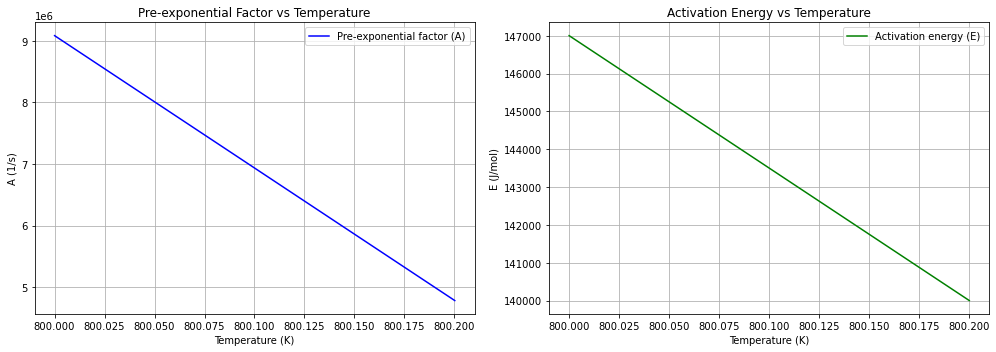

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Constants
E = 161260  # J/mol
Ko = 2.08e10     # 1/s
R = 8.314    # J/mol*K
m, n, p = 1, 0.3, 0.5
Beta = 5 / 60  # K/s
To = 800  # Starting temperature in K

# Function to solve ODE for a given temperature
def SSRX(T, y):
    alpha = y  # Extent of reaction
    alpha = np.clip(alpha, 1e-10, 1 - 1e-10)  # Keep alpha in (0,1)

    k = Ko * np.exp(-E0 / (R * T))  # Arrhenius rate constant using initial guess
    f_alpha = ((1 - alpha)**m) * (alpha**n) * (-np.log(1 - alpha))**p  # Reaction model
    dalpha_dT = k * f_alpha / Beta
    
    return [dalpha_dT]

# Initial condition and temperature range
y0 = [0.00001]
Tspan = (To, 1000)
Tper = np.linspace(To, 1000, 1000)

# Solve the ODE
ans = solve_ivp(SSRX, Tspan, y0, method='RK45', dense_output=True)
antwoord = ans.sol(Tper)
# Extract alpha values from the solution
alpha_vals = antwoord[0,:]

# Calculate dalpha/dT at each temperature step
dalpha_dT_values = []
for i in range(len(Tper)):
    alpha = antwoord[0][i]
    T_alpha = Tper[i]
    dalpha_dT = SSRX(T_alpha, alpha)[0]
    dalpha_dT_values.append(dalpha_dT)

# Find index of max rate
max_index = np.argmax(dalpha_dT_values)
T_max_rate = Tper[max_index]

# Arrays to store A and E for each extent of conversion
A_results = []
E_results = []

# Iterate through the results
for i in range(len(Tper)):
    T_alpha = Tper[i]
    alpha = alpha_vals[i]
    
    # Skip invalid alpha values
    if alpha <= 0 or alpha >= 1:
        A_results.append(np.nan)
        E_results.append(np.nan)
        continue
    
    # Calculate t_alpha from T_alpha
    t_alpha = (T_alpha - To) / Beta

    # Use local A_E_solver for this point
    def A_E_solver(y):
        A, E = y
        eq1 = Beta * E / R / (T_max_rate**2) * np.exp(E / (R * T_max_rate)) - A
        eq2 = -np.log(1 - alpha) / A / np.exp(E / (R * T_alpha)) - t_alpha
        return eq1, eq2

    try:
        A_E = fsolve(A_E_solver, [9**7, 140 * 1000])
        A_results.append(A_E[0])
        E_results.append(A_E[1])
    except:
        A_results.append(np.nan)
        E_results.append(np.nan)

# Plot A and E side by side
plt.figure(figsize=(14, 5))

# Plot A (Pre-exponential factor)
plt.subplot(1, 2, 1)
plt.plot(Tper, A_results, label='Pre-exponential factor (A)', color='blue')
plt.xlabel('Temperature (K)')
plt.ylabel('A (1/s)')
plt.title('Pre-exponential Factor vs Temperature')
plt.grid(True)
plt.legend()

# Plot E (Activation energy)
plt.subplot(1, 2, 2)
plt.plot(Tper, E_results, label='Activation energy (E)', color='green')
plt.xlabel('Temperature (K)')
plt.ylabel('E (J/mol)')
plt.title('Activation Energy vs Temperature')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Kissinger-Akahira-Sunose method

This is the final isoconversional method we'll consider. Like the others, it assumes that the experimental data was obtained under a **linear heating rate**. The core equation of the KAS method is:

$$
\Large \ln\left(\frac{\beta_i}{T_{\alpha,i}^2}\right) = \text{const} - \frac{E_\alpha}{R T_{\alpha,i}}
$$


This method relies on the idea that the **activation energy** \$( E_\alpha \)$ remains constant for a given reaction. By rearranging the equation, the term involving $\( E_\alpha \)$ is moved to the left-hand side. If the method is accurate, the result should be a constant value, forming a **horizontal line** (i.e., a slope of zero) when plotted.

Surprisingly, the KAS method performed very well. Even though it is essentially a straight-line method, it returned highly accurate results. In fact, the closer the **extent of conversion** gets to completion, the more accurate the predicted activation energy becomes. This indicates that KAS can provide a reliable estimate of $( E_\alpha )$ across a wide range of conversions.


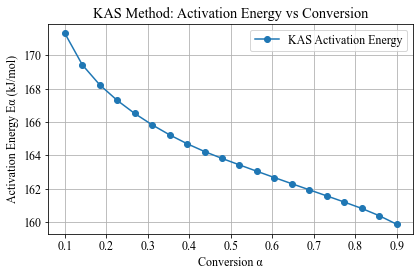

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Constants
E = 161260  # J/mol
Ko = 2.08e10     # 1/s
R = 8.314    # J/mol*K
m, n, p = 1, 0.3, 0.5
To = 580  # K
y0 = [1e-5]
T_end = 700
T_range = np.linspace(To, T_end, 1000)
Betas = [1/60, 2/60, 3/60, 4/60]  # K/s
alpha_targets = np.linspace(0.1, 0.9, 20)

# Store alpha vs T data for each beta
alpha_vs_T = {}

for Beta in Betas:
    def SSRX(T, y):
        alpha = np.clip(y[0], 1e-10, 1 - 1e-10)
        k = Ko * np.exp(-E0 / (R * T))
        f_alpha = ((1 - alpha)**m) * (alpha**n) * (-np.log(1 - alpha))**p
        return [k * f_alpha / Beta]

    ans = solve_ivp(SSRX, (To, T_end), y0, t_eval=T_range)
    alpha_vs_T[Beta] = (ans.t, ans.y[0])

# Compute E_alpha at each alpha_target
results = []

for alpha_target in alpha_targets:
    T_inv = []
    ln_term = []

    for Beta in Betas:
        T_vals, alpha_vals = alpha_vs_T[Beta]
        try:
            T_alpha_func = interp1d(alpha_vals, T_vals, bounds_error=True)
            T_alpha = T_alpha_func(alpha_target)
            T_inv.append(1 / T_alpha)
            ln_term.append(np.log(Beta / T_alpha**2))
        except:
            pass  # Skip if interpolation fails

    if len(T_inv) >= 2:
        slope, intercept = np.polyfit(T_inv, ln_term, 1)
        E_alpha = -slope * R
        results.append((alpha_target, E_alpha))

# Plot
alphas, E_vals = zip(*results)
plt.plot(alphas, np.array(E_vals)/1000, 'o-', label='KAS Activation Energy')
plt.xlabel('Conversion α')
plt.ylabel('Activation Energy Eα (kJ/mol)')
plt.title('KAS Method: Activation Energy vs Conversion')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Data from Literature

Text(0.5, 1.0, 'α vs T for a Malacite Sample')

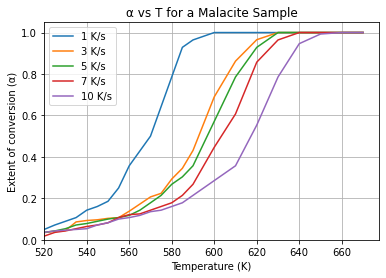

In [12]:
alpha1 = [
    0.05, 0.071428571, 0.089285714, 0.107142857, 0.142857143,
    0.160714286, 0.185714286, 0.25, 0.357142857, 0.428571429,
    0.5, 0.642857143, 0.785714286, 0.928571429, 0.964285714,
    1, 1, 1, 1, 1, 1, 1, 1
]

alpha2 = [
    0.034482759, 0.04137931, 0.044827586, 0.086206897, 0.093103448,
    0.096551724, 0.103448276, 0.106896552, 0.137931034, 0.172413793,
    0.206896552, 0.224137931, 0.293103448, 0.344827586, 0.431034483,
    0.689655172, 0.862068966, 0.965517241, 1, 1, 1, 1, 1
]

alpha3 = [
    0.035714286, 0.042857143, 0.053571429, 0.071428571, 0.078571429,
    0.089285714, 0.1, 0.107142857, 0.117857143, 0.142857143,
    0.178571429, 0.214285714, 0.267857143, 0.303571429, 0.357142857,
    0.571428571, 0.785714286, 0.928571429, 1, 1, 1, 1, 1
]

alpha4 = [
    0.017857143, 0.035714286, 0.042857143, 0.053571429, 0.064285714,
    0.071428571, 0.082142857, 0.107142857, 0.121428571, 0.125,
    0.142857143, 0.160714286, 0.178571429, 0.214285714, 0.267857143,
    0.446428571, 0.607142857, 0.857142857, 0.964285714, 1, 1, 1, 1
]

alpha5 = [
    0.035714286, 0.042857143, 0.046428571, 0.05, 0.053571429,
    0.071428571, 0.082142857, 0.1, 0.107142857, 0.117857143,
    0.135714286, 0.142857143, 0.160714286, 0.178571429, 0.214285714,
    0.285714286, 0.357142857, 0.553571429, 0.785714286, 0.946428571,
    0.992857143, 1, 1
]

T = [
    520, 525, 530, 535, 540,
    545, 550, 555, 560, 565,
    570, 575, 580, 585, 590,
    600, 610, 620, 630, 640,
    650, 660, 670
]

Beta1 = 1/60 # K/s
Beta2 = 3/60 # K/s
Beta3 = 5/60 # K/s
Beta4 = 7/60 # K/s
Beta5 = 10/60 # K/s

plt.plot(T, alpha1, label = '1 K/s')
plt.plot(T, alpha2, label = '3 K/s')
plt.plot(T, alpha3, label = '5 K/s')
plt.plot(T, alpha4, label = '7 K/s')
plt.plot(T, alpha5, label = '10 K/s')
plt.legend(loc = 'best')
plt.xlabel('Temperature (K)')
plt.ylabel('Extent of conversion (α)')
plt.grid(True)
plt.xlim(T[0])
plt.ylim(0)
plt.title('α vs T for a Malacite Sample')

# Results from the approximation method

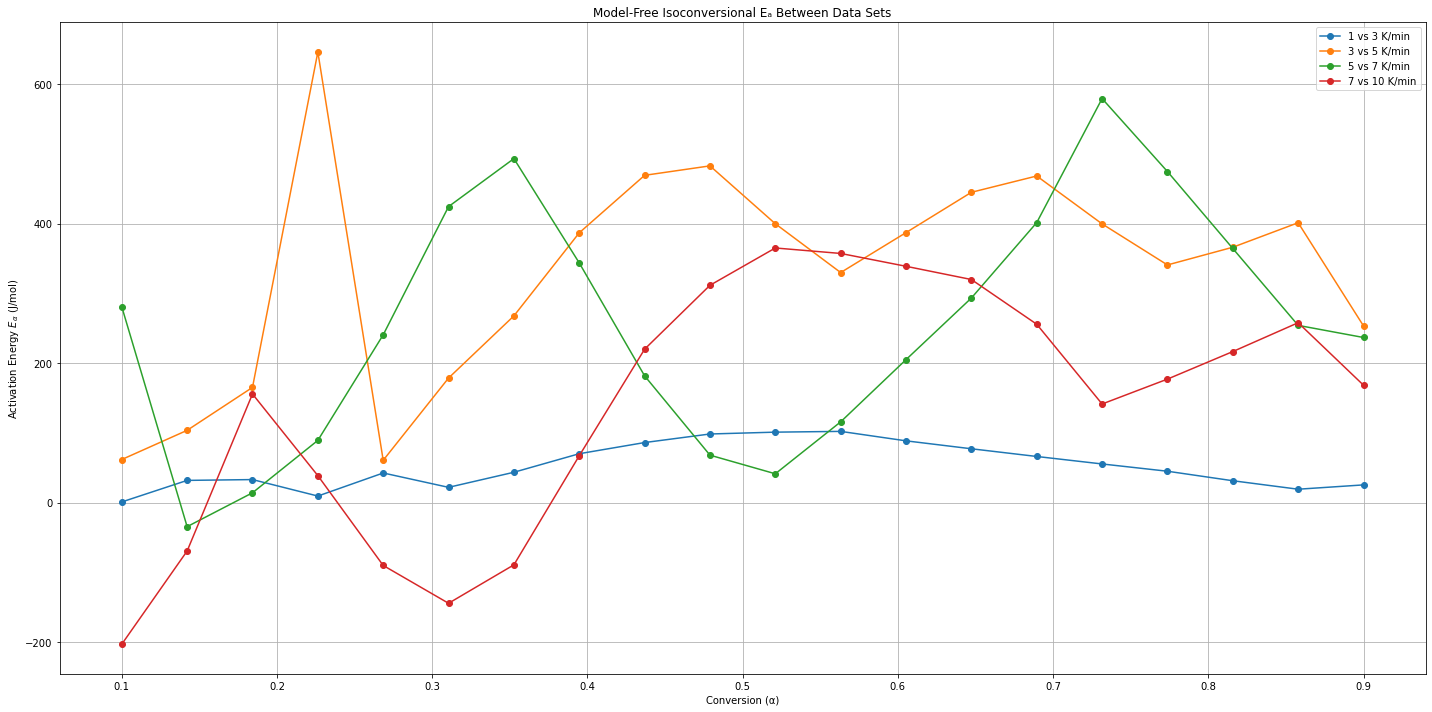

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Constants
R = 8.314  # J/mol.K

# Heating rates (K/s)
Beta1, Beta2, Beta3, Beta4, Beta5 = 1/60, 3/60, 5/60, 7/60, 10/60

# Temperature (K)
T = np.array([
    520, 525, 530, 535, 540,
    545, 550, 555, 560, 565,
    570, 575, 580, 585, 590,
    600, 610, 620, 630, 640,
    650, 660, 670
])

# Experimental alpha data
# Convert alpha lists to numpy arrays
alpha_sets = [np.array(alpha) for alpha in [alpha1, alpha2, alpha3, alpha4, alpha5]]
betas = [Beta1, Beta2, Beta3, Beta4, Beta5]
labels = ['1 vs 3 K/min', '3 vs 5 K/min', '5 vs 7 K/min', '7 vs 10 K/min']

# Function to calculate dα/dt
def dalpha_dt(alpha, T, beta):
    dT = np.diff(T)
    d_alpha = np.diff(alpha)
    dadt = d_alpha / dT * beta  # Convert to dα/dt using dT/dt = β
    T_mid = (T[:-1] + T[1:]) / 2  # Midpoints for plotting
    alpha_mid = (alpha[:-1] + alpha[1:]) / 2
    return T_mid, alpha_mid, dadt

# Function to compute E_alpha from two datasets
def compute_Ealpha(alphaA, alphaB, T, betaA, betaB):
    # Get dα/dt for both
    T1, alpha1, dadt1 = dalpha_dt(alphaA, T, betaA)
    T2, alpha2, dadt2 = dalpha_dt(alphaB, T, betaB)
    
    # Interpolate to common alpha values
    common_alpha = np.linspace(0.1, 0.9, 20)
    T1_interp = interp1d(alpha1, T1, bounds_error=False, fill_value='extrapolate')
    T2_interp = interp1d(alpha2, T2, bounds_error=False, fill_value='extrapolate')
    dadt1_interp = interp1d(alpha1, dadt1, bounds_error=False, fill_value='extrapolate')
    dadt2_interp = interp1d(alpha2, dadt2, bounds_error=False, fill_value='extrapolate')
    
    T1_common = T1_interp(common_alpha)
    T2_common = T2_interp(common_alpha)
    dadt1_common = dadt1_interp(common_alpha)
    dadt2_common = dadt2_interp(common_alpha)
    
    # Calculate inverse T
    invT1 = 1 / T1_common
    invT2 = 1 / T2_common

    # Δ(dα/dt) / Δ(1/T)
    delta_dadt = dadt2_common - dadt1_common
    delta_invT = invT2 - invT1

    # Avoid divide by zero or noise near 0
    valid = (np.abs(delta_invT) > 1e-6) & (dadt1_common > 0) & (dadt2_common > 0)
    E_alpha = -R * (delta_dadt[valid] / delta_invT[valid])
    
    return common_alpha[valid], E_alpha

# Plot all pairs
plt.figure(figsize=(20, 10))

for i in range(4):
    alphaA, alphaB = alpha_sets[i], alpha_sets[i+1]
    betaA, betaB = betas[i], betas[i+1]
    
    alpha_vals, E_vals = compute_Ealpha(alphaA, alphaB, T, betaA, betaB)
    plt.plot(alpha_vals, E_vals, 'o-', label=labels[i])

plt.xlabel('Conversion (α)')
plt.ylabel(r'Activation Energy $E_{\alpha}$ (J/mol)')
plt.title('Model-Free Isoconversional Eₐ Between Data Sets')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


As shown in the graph, the method produces highly questionable results: the calculated activation energy exhibits unrealistic negative values and large, erratic fluctuations across the dataset. This behavior is highly improbable in a real physical system and suggests a fundamental problem with the approach. Therefore, it can be concluded that the method, as implemented, is unreliable, and any activation energy values derived from it should be considered invalid.

The core issue lies in how the method was applied in the code. The intended goal was to estimate activation energy by comparing the rate of change of conversion, $ \frac{d\alpha}{dt} $, at **identical** values of $ \alpha $ across datasets with different heating rates. This is the foundation of isoconversional methods, which rely on analyzing kinetic behavior at constant conversion levels.

However, the implementation incorrectly computed $ \frac{\Delta \alpha}{\Delta T} $ independently for each dataset and then attempted to estimate activation energies by comparing these rate approximations and the corresponding inverse temperatures. This approach falsely assumes that the $ \alpha $ values in each dataset are aligned with one another — when in reality, each heating rate reaches the same $ \alpha $ at a different temperature. As a result, comparing values of $ \frac{d\alpha}{dt} $ from misaligned $ \alpha $ points leads to invalid conclusions.

This flaw explains the severe fluctuations and negative activation energies observed in the output. To correctly apply an isoconversional method, one must first interpolate the data to identify the temperatures corresponding to fixed $ \alpha $ values across all heating rates. Only then can consistent differences in reaction rates and temperatures be used to estimate meaningful activation energies.

Furthermore, even when model-based data was used (i.e., data generated using an assumed kinetic model), the analysis still failed to produce valid results. This reflects a deeper, conceptual issue rooted in the mathematical structure of the method itself.

The definition of a partial derivative highlights this limitation:

$$
\Large \left( \frac{\partial f(x, y, \dots)}{\partial x} \right)_{y, \dots} = \lim_{h \to 0} \frac{f(x + h, y, \dots) - f(x, y, \dots)}{h}
$$

According to this definition, to compute a partial derivative with respect to one variable (e.g., time or temperature), **all other variables must remain constant**. In the context of this analysis, attempting to approximate a derivative like $ \frac{d\alpha}{dt} $ or $ \frac{d\alpha}{dT} $ results in **simultaneous changes in both temperature and conversion**, since these two variables are inherently coupled during thermal analysis. This violates the condition required for a proper partial derivative, undermining the theoretical foundation of the method.

In conclusion, the current implementation does not satisfy the core assumptions of the isoconversional method and therefore yields results that are not just inaccurate but **physically meaningless**. A proper implementation must preserve the mathematical integrity of the method by ensuring all comparisons are made at constant conversion levels. Until then, the results must be regarded as null and void.


# Results from the Friedman method

<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)


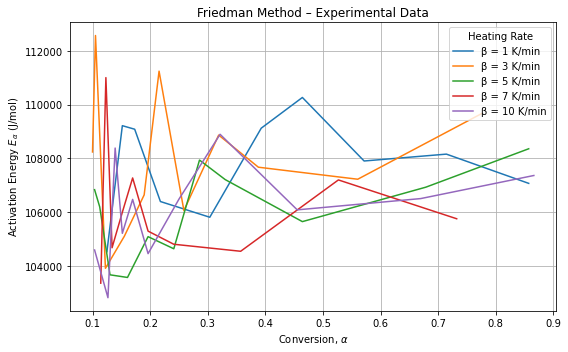

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # J/(mol*K)
Ko = 1e7   # Pre-exponential factor
m, n, p = 1, 0.3, 0.5  # Reaction model parameters

# Experimental Data
alpha1 = np.array([
    0.05, 0.071428571, 0.089285714, 0.107142857, 0.142857143,
    0.160714286, 0.185714286, 0.25, 0.357142857, 0.428571429,
    0.5, 0.642857143, 0.785714286, 0.928571429, 0.964285714,
    1, 1, 1, 1, 1, 1, 1, 1
])
alpha2 = np.array([
    0.034482759, 0.04137931, 0.044827586, 0.086206897, 0.093103448,
    0.096551724, 0.103448276, 0.106896552, 0.137931034, 0.172413793,
    0.206896552, 0.224137931, 0.293103448, 0.344827586, 0.431034483,
    0.689655172, 0.862068966, 0.965517241, 1, 1, 1, 1, 1
])
alpha3 = np.array([
    0.035714286, 0.042857143, 0.053571429, 0.071428571, 0.078571429,
    0.089285714, 0.1, 0.107142857, 0.117857143, 0.142857143,
    0.178571429, 0.214285714, 0.267857143, 0.303571429, 0.357142857,
    0.571428571, 0.785714286, 0.928571429, 1, 1, 1, 1, 1
])
alpha4 = np.array([
    0.017857143, 0.035714286, 0.042857143, 0.053571429, 0.064285714,
    0.071428571, 0.082142857, 0.107142857, 0.121428571, 0.125,
    0.142857143, 0.160714286, 0.178571429, 0.214285714, 0.267857143,
    0.446428571, 0.607142857, 0.857142857, 0.964285714, 1, 1, 1, 1
])
alpha5 = np.array([
    0.035714286, 0.042857143, 0.046428571, 0.05, 0.053571429,
    0.071428571, 0.082142857, 0.1, 0.107142857, 0.117857143,
    0.135714286, 0.142857143, 0.160714286, 0.178571429, 0.214285714,
    0.285714286, 0.357142857, 0.553571429, 0.785714286, 0.946428571,
    0.992857143, 1, 1
])
T = np.array([
    520, 525, 530, 535, 540,
    545, 550, 555, 560, 565,
    570, 575, 580, 585, 590,
    600, 610, 620, 630, 640,
    650, 660, 670
])

# Heating rates (K/s)
betas = [1/60, 3/60, 5/60, 7/60, 10/60]
alphas = [alpha1, alpha2, alpha3, alpha4, alpha5]

# SSRX (solid-state reaction model)
def SSRX(alpha, m, n, p):
    alpha = np.clip(alpha, 1e-10, 1 - 1e-10)
    return ((1 - alpha)**m) * (alpha**n) * (-np.log(1 - alpha))**p

# Friedman method — fixed to return arrays
def Friedman_single(alpha, T, beta):
    delta_alpha = np.diff(alpha)
    delta_T = np.diff(T)
    dadt = beta * (delta_alpha / delta_T)
    ln_beta_dadt = np.log(dadt)
    inv_T = 1 / (0.5 * (T[:-1] + T[1:]))
    alpha_mid = 0.5 * (alpha[:-1] + alpha[1:])
    
    f_alpha = SSRX(alpha_mid, m, n, p)
    ln_f = np.log(f_alpha * Ko)
    
    ln_ratio = ln_beta_dadt - ln_f
    Ea = -ln_ratio * R * (1 / inv_T)
    
    return alpha_mid, Ea

# Plot each heating rate's Friedman result
plt.figure(figsize=(8, 5))

for i in range(len(alphas)):
    alpha_mid, Ea_vals = Friedman_single(alphas[i], T, betas[i])
    
    # Filter α between 0.1 and 0.9
    mask = (alpha_mid >= 0.1) & (alpha_mid <= 0.9)
    
    plt.plot(alpha_mid[mask], Ea_vals[mask], label=f'β = {betas[i]*60:.0f} K/min')

# Plot styling
plt.xlabel(r'Conversion, $\alpha$')
plt.ylabel(r'Activation Energy $E_\alpha$ (J/mol)')
plt.title('Friedman Method – Experimental Data')
plt.grid(True)
plt.legend(title='Heating Rate')
plt.tight_layout()

# Save figure
plt.show()


The Friedman method provides a useful estimate for activation energy by graphically identifying a range between the top-most and bottom-most points on the plot. This range can serve as a close approximation of the expected activation energy, which aids in determining the kinetic parameters of a reaction. However, this method is limited by several key factors:

- **Single Reaction Mechanism**: The Friedman method assumes a single, well-defined reaction mechanism, making it unsuitable for systems with multiple, competing reaction pathways. This limits its applicability in complex reactions.

- **Known Reaction Mechanism**: The method requires a known or assumed reaction mechanism (e.g., specific forms of f($\alpha\$)). In cases where the mechanism is not well understood, this assumption can lead to inaccuracies.

- **Temperature Dependence of Pre-Exponential Constant**: The method assumes that the pre-exponential factor ( k$\_o \$) is constant across the temperature range. However, in real systems, this constant is often temperature-dependent, and failing to account for this variation can skew the results.

In summary, while the Friedman method can provide a reasonable estimate for activation energy, its reliance on a known reaction mechanism and the assumption of a constant pre-exponential factor limit its broader applicability. For more complex systems, additional methods or refinements may be needed to capture the full kinetics of the reaction.


# Results from the KAS method

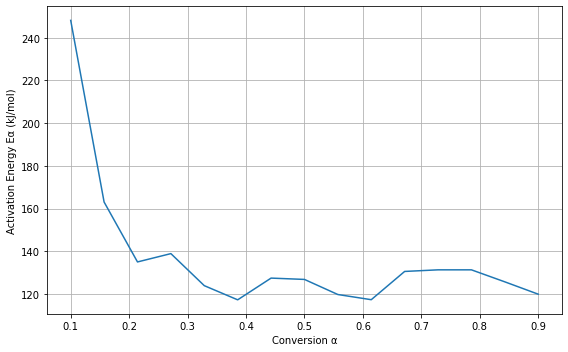

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Provided data
T = np.array([
    520, 525, 530, 535, 540,
    545, 550, 555, 560, 565,
    570, 575, 580, 585, 590,
    600, 610, 620, 630, 640,
    650, 660, 670
])
T_inv = 1 / T

Beta1 = 1 / 60
Beta2 = 3 / 60
Beta3 = 5 / 60
Beta4 = 7 / 60
Beta5 = 10 / 60

Betas = [Beta1, Beta2, Beta3, Beta4, Beta5]
alphas_data = [
    np.array([
        0.05, 0.071428571, 0.089285714, 0.107142857, 0.142857143,
        0.160714286, 0.185714286, 0.25, 0.357142857, 0.428571429,
        0.5, 0.642857143, 0.785714286, 0.928571429, 0.964285714,
        1, 1, 1, 1, 1, 1, 1, 1
    ]),
    np.array([
        0.034482759, 0.04137931, 0.044827586, 0.086206897, 0.093103448,
        0.096551724, 0.103448276, 0.106896552, 0.137931034, 0.172413793,
        0.206896552, 0.224137931, 0.293103448, 0.344827586, 0.431034483,
        0.689655172, 0.862068966, 0.965517241, 1, 1, 1, 1, 1
    ]),
    np.array([
        0.035714286, 0.042857143, 0.053571429, 0.071428571, 0.078571429,
        0.089285714, 0.1, 0.107142857, 0.117857143, 0.142857143,
        0.178571429, 0.214285714, 0.267857143, 0.303571429, 0.357142857,
        0.571428571, 0.785714286, 0.928571429, 1, 1, 1, 1, 1
    ]),
    np.array([
        0.017857143, 0.035714286, 0.042857143, 0.053571429, 0.064285714,
        0.071428571, 0.082142857, 0.107142857, 0.121428571, 0.125,
        0.142857143, 0.160714286, 0.178571429, 0.214285714, 0.267857143,
        0.446428571, 0.607142857, 0.857142857, 0.964285714, 1, 1, 1, 1
    ]),
    np.array([
        0.035714286, 0.042857143, 0.046428571, 0.05, 0.053571429,
        0.071428571, 0.082142857, 0.1, 0.107142857, 0.117857143,
        0.135714286, 0.142857143, 0.160714286, 0.178571429, 0.214285714,
        0.285714286, 0.357142857, 0.553571429, 0.785714286, 0.946428571,
        0.992857143, 1, 1
    ])
]

# KAS Method
R = 8.314
alpha_targets = np.linspace(0.1, 0.9, 15)
kas_results = []

for alpha_target in alpha_targets:
    T_alpha = []
    ln_term = []

    for i in range(len(Betas)):
        alpha_array = alphas_data[i]

        if np.any(alpha_array >= alpha_target):
            idx = np.argmax(alpha_array >= alpha_target)
            if idx < len(T):
                T_val = T[idx]
                T_alpha.append(T_val)
                ln_term.append(np.log(Betas[i] / T_val**2))

    if len(T_alpha) >= 2:
        inv_T_alpha = 1 / np.array(T_alpha)
        slope, intercept, *_ = linregress(inv_T_alpha, ln_term)
        E_alpha = -slope * R
        kas_results.append((alpha_target, E_alpha))

# Plotting
alpha_vals, E_vals = zip(*kas_results)
plt.figure(figsize=(8, 5))  # Set the figure size before plotting

plt.plot(alpha_vals, np.array(E_vals)/1000, label='KAS Eα')
plt.xlabel('Conversion α')
plt.ylabel('Activation Energy Eα (kJ/mol)')
plt.grid(True)

plt.tight_layout()  # Optional: adjusts padding
plt.savefig('KAS_Exp.png', bbox_inches='tight', dpi=300)
plt.show()


It should be apparent that the results from the KAS method differ notably from those obtained using other methods. The KAS method stands out by combining multiple experimental datasets obtained at different heating rates to estimate the activation energy of a reaction. While none of the methods considered yield a single definitive value for the activation energy, they do provide valuable insight into the range and behavior of the activation energy across the conversion range.

In the case of the KAS method specifically, it is important to omit the extremes—where $\alpha$ is close to 0 or 1—from the analysis. These regions tend to exhibit the greatest variation in calculated activation energy and can distort the overall trend. For more consistent and reliable results, the method should be applied within the range $0.2 \leq \alpha \leq 0.9$.

It is generally recommended to use both differential and integral methods in parallel. In my opinion, this is particularly valuable because if both types of methods produce results that follow the same trend, it strengthens confidence in the reliability of the data and the conclusions drawn from it.


# Method Comparison

<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)


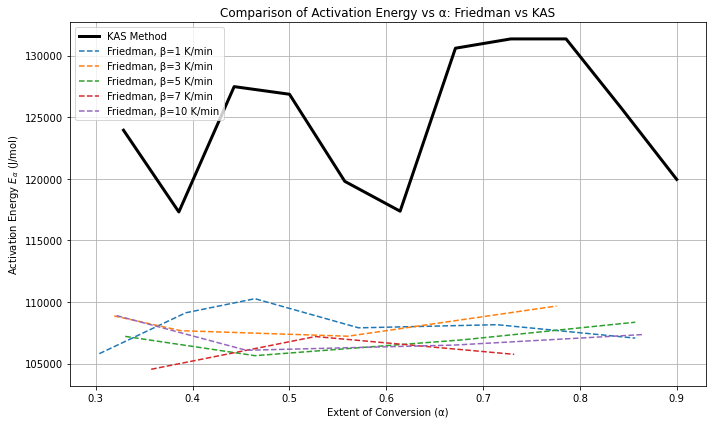

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Convert KAS Ea to J/mol (if in kJ/mol)
kas_alpha = np.array(alpha_vals)
kas_Ea = np.array(E_vals) # Convert to J/mol

# Filter KAS data to 0.3 ≤ α ≤ 0.9
kas_mask = (kas_alpha >= 0.3) & (kas_alpha <= 0.9)
kas_alpha = kas_alpha[kas_mask]
kas_Ea = kas_Ea[kas_mask]

# Plot KAS curve
plt.figure(figsize=(10, 6))
plt.plot(kas_alpha, kas_Ea, label='KAS Method', linewidth=3, color='black')

# Plot Friedman curves for each heating rate
for i, beta in enumerate(betas):
    alpha_fried, Ea_fried = Friedman_single(alphas[i], T, beta)
    
    # Filter Friedman data to 0.3 ≤ α ≤ 0.9
    mask = (alpha_fried >= 0.3) & (alpha_fried <= 0.9)
    alpha_fried = alpha_fried[mask]
    Ea_fried = Ea_fried[mask]
    
    plt.plot(alpha_fried, Ea_fried, label=f'Friedman, β={beta*60:.0f} K/min', linestyle='--')

# Plot formatting
plt.xlabel('Extent of Conversion (α)')
plt.ylabel('Activation Energy $E_\\alpha$ (J/mol)')
plt.title('Comparison of Activation Energy vs α: Friedman vs KAS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Convert KAS Ea values from kJ/mol to J/mol (if needed)
kas_alpha = np.array(alpha_vals)
kas_Ea = np.array(E_vals)  # now in J/mol

# Filter to 0.3 ≤ α ≤ 0.9
kas_mask = (kas_alpha >= 0.3) & (kas_alpha <= 0.9)
kas_alpha = kas_alpha[kas_mask]
kas_Ea = kas_Ea[kas_mask]

# Common alpha grid (optional: you can also use kas_alpha directly)
common_alpha = kas_alpha

# Interpolate KAS onto common alpha grid (not needed here if using kas_alpha directly)
kas_interp_Ea = kas_Ea

# Now loop over Friedman datasets
for i in range(len(betas)):
    alpha_fried, Ea_fried = Friedman_single(alphas[i], T, betas[i])
    
    # Filter Friedman to 0.3 ≤ α ≤ 0.9
    mask = (alpha_fried >= 0.3) & (alpha_fried <= 0.9)
    alpha_fried = alpha_fried[mask]
    Ea_fried = Ea_fried[mask]

    # Interpolate Friedman Ea onto KAS alpha grid
    Ea_fried_interp = np.interp(common_alpha, alpha_fried, Ea_fried)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(kas_interp_Ea, Ea_fried_interp))
    print(f"Heating rate {betas[i]*60:.0f} K/min → RMSE = {rmse:.2f} J/mol")


Heating rate 1 K/min → RMSE = 17378.24 J/mol
Heating rate 3 K/min → RMSE = 16963.45 J/mol
Heating rate 5 K/min → RMSE = 18434.25 J/mol
Heating rate 7 K/min → RMSE = 19501.85 J/mol
Heating rate 10 K/min → RMSE = 18536.37 J/mol


<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-14-0c3f0ef0d89e>:63: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)


# Second Reaction

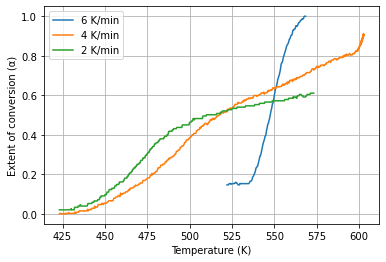

In [14]:
import pandas as pd
import numpy as np

# File path
file_path = "Litha's Data.xlsx"

# Sheet names
sheet_names = ['2°C CoF2 CoF3', '6°C CoF3 CoF2', '4°C CoF3 CoF2', '2°C CoF3 CoF2']

# Lists to store arrays
T_arrays = []
alpha_arrays = []

# Loop through sheets and extract data as NumPy arrays
for sheet in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    
    # Extract 2nd and 3rd columns and convert to NumPy arrays
    T_array = df.iloc[:, 1].to_numpy()
    alpha_array = df.iloc[:, 2].to_numpy()
    
    # Append to lists
    T_arrays.append(T_array)
    alpha_arrays.append(alpha_array)

# ✅ Now you have:
# - T_arrays = [T0, T1, T2, T3] as NumPy arrays
# - alpha_arrays = [alpha0, alpha1, alpha2, alpha3] as NumPy arrays

# Example: access T1 and alpha2
T1 = T_arrays[1] + 273.15
T2 = T_arrays[2] + 273.15
T3 = T_arrays[3] + 273.15
alpha1 = alpha_arrays[1]
alpha2 = alpha_arrays[2]
alpha3 = alpha_arrays[3]
Beta1 = 6/60
Beta2 = 4/60
Beta3 = 2/60


plt.plot(T1, alpha1, label = '6 K/min')
plt.plot(T2, alpha2, label = '4 K/min')
plt.plot(T3, alpha3, label = '2 K/min')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('Temperature (K)')
plt.ylabel('Extent of conversion (α)')
plt.show()

# Friedman method results

<ipython-input-15-f3797638e2b4>:41: RuntimeWarning: divide by zero encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-15-f3797638e2b4>:41: RuntimeWarning: invalid value encountered in log
  ln_beta_dadt = np.log(dadt)
<ipython-input-15-f3797638e2b4>:40: RuntimeWarning: divide by zero encountered in true_divide
  dadt = beta * (delta_alpha / delta_T)
<ipython-input-15-f3797638e2b4>:40: RuntimeWarning: invalid value encountered in true_divide
  dadt = beta * (delta_alpha / delta_T)


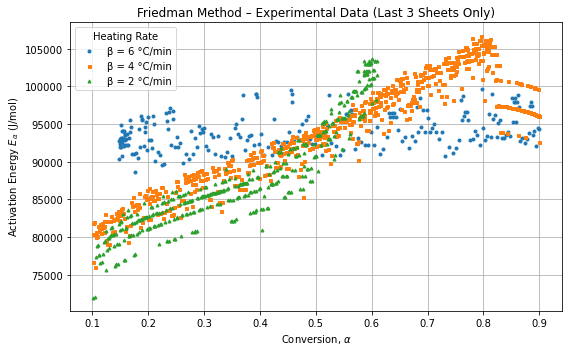

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Excel file
file_path = "/Users/Divan/Downloads/4th year/1st semester/CSC411/Data/Litha's Data.xlsx"

# Only include the last 3 sheets
sheet_names = ['6°C CoF3 CoF2', '4°C CoF3 CoF2', '2°C CoF3 CoF2']

# Initialize arrays
T_arrays = []
alpha_arrays = []

# Read and convert temperature to Kelvin
for sheet in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    T_array = df.iloc[:, 1].to_numpy() + 273.15  # Convert to Kelvin
    alpha_array = df.iloc[:, 2].to_numpy()
    T_arrays.append(T_array)
    alpha_arrays.append(alpha_array)

# Define heating rates (K/s) corresponding to the sheets above
betas = [6/60, 4/60, 2/60]

# Constants
R = 8.314  # J/mol·K
Ko = 1e7
m, n, p = 1, 0.3, 0.5

# Solid-state reaction model
def SSRX(alpha, m, n, p):
    alpha = np.clip(alpha, 1e-10, 1 - 1e-10)
    return ((1 - alpha)**m) * (alpha**n) * (-np.log(1 - alpha))**p

# Friedman method function
def Friedman_single(alpha, T, beta):
    delta_alpha = np.diff(alpha)
    delta_T = np.diff(T)
    dadt = beta * (delta_alpha / delta_T)
    ln_beta_dadt = np.log(dadt)
    inv_T = 1 / (0.5 * (T[:-1] + T[1:]))
    alpha_mid = 0.5 * (alpha[:-1] + alpha[1:])
    f_alpha = SSRX(alpha_mid, m, n, p)
    ln_f = np.log(f_alpha * Ko)
    ln_ratio = ln_beta_dadt - ln_f
    Ea = -ln_ratio * R * (1 / inv_T)
    return alpha_mid, Ea

# Apply method and collect results
results = []
for i, (T, alpha, beta) in enumerate(zip(T_arrays, alpha_arrays, betas)):
    alpha_mid, Ea = Friedman_single(alpha, T, beta)
    results.append((alpha_mid, Ea))

# Marker styles for each heating rate
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Plotting
plt.figure(figsize=(8, 5))
for i, (alpha_mid, Ea) in enumerate(results):
    mask = (alpha_mid >= 0.1) & (alpha_mid <= 0.9)
    label = f'β = {betas[i]*60:.0f} °C/min'
    plt.plot(
        alpha_mid[mask], Ea[mask],
        label=label,
        marker=markers[i],
        linestyle='None',
        markersize=3
    )

plt.xlabel(r'Conversion, $\alpha$')
plt.ylabel(r'Activation Energy $E_\alpha$ (J/mol)')
plt.title('Friedman Method – Experimental Data (Last 3 Sheets Only)')
plt.grid(True)
plt.legend(title='Heating Rate')
plt.tight_layout()
plt.show()


# KAS Results

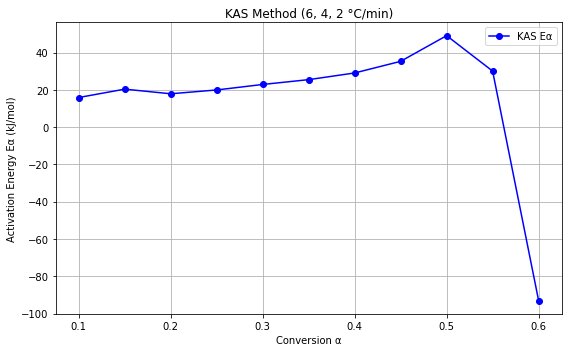

[(0.1, 15861.819182221841),
 (0.15000000000000002, 20350.662534316783),
 (0.20000000000000004, 17870.21615309397),
 (0.25000000000000006, 19918.6680764481),
 (0.30000000000000004, 22862.266572995806),
 (0.3500000000000001, 25449.525509692343),
 (0.40000000000000013, 29031.554353166037),
 (0.45000000000000007, 35268.34592939673),
 (0.5000000000000001, 49045.153736901084),
 (0.5500000000000002, 30033.99160623259),
 (0.6000000000000002, -93022.81552479122)]

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# File path
file_path = "/Users/Divan/Downloads/4th year/1st semester/CSC411/Data/Litha's Data.xlsx"

# Sheet names (extracting only 2nd, 3rd, and 4th sheets)
sheet_names = ['6°C CoF3 CoF2', '4°C CoF3 CoF2', '2°C CoF3 CoF2']

# Lists to store temperature and alpha arrays
T_arrays = []
alpha_arrays = []

# Loop through selected sheets and read data
for sheet in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    T_array = df.iloc[:, 1].to_numpy() + 273.15  # Convert to Kelvin
    alpha_array = df.iloc[:, 2].to_numpy()
    
    T_arrays.append(T_array)
    alpha_arrays.append(alpha_array)

# Heating rates (in K/s)
betas = [6/60, 4/60, 2/60]

# KAS Method
R = 8.314  # J/mol·K
alpha_targets = np.arange(0.1, 0.61, 0.05)
kas_results = []

for alpha_target in alpha_targets:
    T_alpha = []
    ln_term = []

    for i in range(len(betas)):
        alpha_array = alpha_arrays[i]
        T_array = T_arrays[i]

        if np.any(alpha_array >= alpha_target):
            idx = np.argmax(alpha_array >= alpha_target)
            if idx < len(T_array):
                T_val = T_array[idx]
                T_alpha.append(T_val)
                ln_term.append(np.log(betas[i] / T_val**2))

    if len(T_alpha) >= 2:
        inv_T_alpha = 1 / np.array(T_alpha)
        slope, intercept, *_ = linregress(inv_T_alpha, ln_term)
        E_alpha = -slope * R
        kas_results.append((alpha_target, E_alpha))

# Plotting
alpha_vals, E_vals = zip(*kas_results)

plt.figure(figsize=(8, 5))
plt.plot(alpha_vals, np.array(E_vals)/1000, 'bo-', label='KAS Eα')
plt.xlabel('Conversion α')
plt.ylabel('Activation Energy Eα (kJ/mol)')
plt.title('KAS Method (6, 4, 2 °C/min)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

kas_results
